In [1]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import pandas as pd
ff1.Cache.enable_cache('C:/Users/benme/OneDrive - The Perse School/Formula 1')

In [2]:
race = ff1.get_session(2022, japan, R)

NameError: name 'japan' is not defined

In [3]:
race = ff1.get_session(2022, 'japan', 'R')

In [5]:
race.load()

core           INFO 	Loading data for Japanese Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	No cached data found for position_data. Loading data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api         WARNING 	Driver 241: Position data is incomplete!
api         WARNING 	Driver 242: Position data is incomplete!
api         WARNING 	Driver 243: Position data is incomplete!
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for weather_data. Loading data...
api            INFO 	Fetching weather data...
api

In [36]:
vet, alo = 'VET', 'ALO'
vet_race = race.laps.pick_driver(vet)
alo_race = race.laps.pick_driver(alo)

In [37]:
vet_race.columns

Index(['Time', 'DriverNumber', 'LapTime', 'LapNumber', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Stint', 'LapStartTime', 'Team',
       'Driver', 'TrackStatus', 'IsAccurate', 'LapStartDate'],
      dtype='object')

In [38]:
vet_race.iloc[[-1,-2]]

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
167,0 days 04:05:06.258000,5,0 days 00:01:50.368000,28.0,NaT,NaT,0 days 00:00:39.498000,0 days 00:00:48.727000,0 days 00:00:22.143000,0 days 04:03:55.388000,...,INTERMEDIATE,23.0,True,3,0 days 04:03:15.890000,Aston Martin,VET,1,True,2022-10-09 08:04:16.167
166,0 days 04:03:15.890000,5,0 days 00:01:49.822000,27.0,NaT,NaT,0 days 00:00:39.667000,0 days 00:00:49.040000,0 days 00:00:21.115000,0 days 04:02:05.735000,...,INTERMEDIATE,22.0,True,3,0 days 04:01:26.068000,Aston Martin,VET,1,True,2022-10-09 08:02:26.345


In [39]:
alo_race.iloc[[-1,-2]]

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
195,0 days 04:05:06.267000,14,0 days 00:01:48.054000,28.0,NaT,NaT,0 days 00:00:38.689000,0 days 00:00:47.779000,0 days 00:00:21.586000,0 days 04:03:56.902000,...,INTERMEDIATE,6.0,True,4,0 days 04:03:18.213000,Alpine,ALO,1,True,2022-10-09 08:04:18.490
194,0 days 04:03:18.213000,14,0 days 00:01:46.296000,27.0,NaT,NaT,0 days 00:00:38.267000,0 days 00:00:47.299000,0 days 00:00:20.730000,0 days 04:02:10.184000,...,INTERMEDIATE,5.0,True,4,0 days 04:01:31.917000,Alpine,ALO,1,True,2022-10-09 08:02:32.194


In [40]:
vet_finallap = vet_race.iloc[[-1]].get_telemetry().add_distance()

In [41]:
alo_finallap = alo_race.iloc[[-1]].get_telemetry().add_distance()

In [42]:
alo_race.Team

168    Alpine
169    Alpine
170    Alpine
171    Alpine
172    Alpine
173    Alpine
174    Alpine
175    Alpine
176    Alpine
177    Alpine
178    Alpine
179    Alpine
180    Alpine
181    Alpine
182    Alpine
183    Alpine
184    Alpine
185    Alpine
186    Alpine
187    Alpine
188    Alpine
189    Alpine
190    Alpine
191    Alpine
192    Alpine
193    Alpine
194    Alpine
195    Alpine
Name: Team, dtype: object

In [43]:
vet_team = 'Aston Martin'
alo_team = 'Alpine'
plot_size = (20, 20)
plot_title = f'{race.event.year} - {race.event.EventName} - {race.name} - {vet} VS {alo}'
plot_ratios = [1, 3, 2, 1, 1, 1, 1]
plot_filename = plot_title.replace(" ", "") + '.png'
race.event

RoundNumber                                                18
Country                                                 Japan
Location                                               Suzuka
OfficialEventName    FORMULA 1 HONDA JAPANESE GRAND PRIX 2022
EventDate                                 2022-10-09 16:00:00
EventName                                 Japanese Grand Prix
EventFormat                                      conventional
Session1                                           Practice 1
Session1Date                              2022-10-07 12:00:00
Session2                                           Practice 2
Session2Date                              2022-10-07 15:00:00
Session3                                           Practice 3
Session3Date                              2022-10-08 12:00:00
Session4                                           Qualifying
Session4Date                              2022-10-08 15:00:00
Session5                                                 Race
Session5

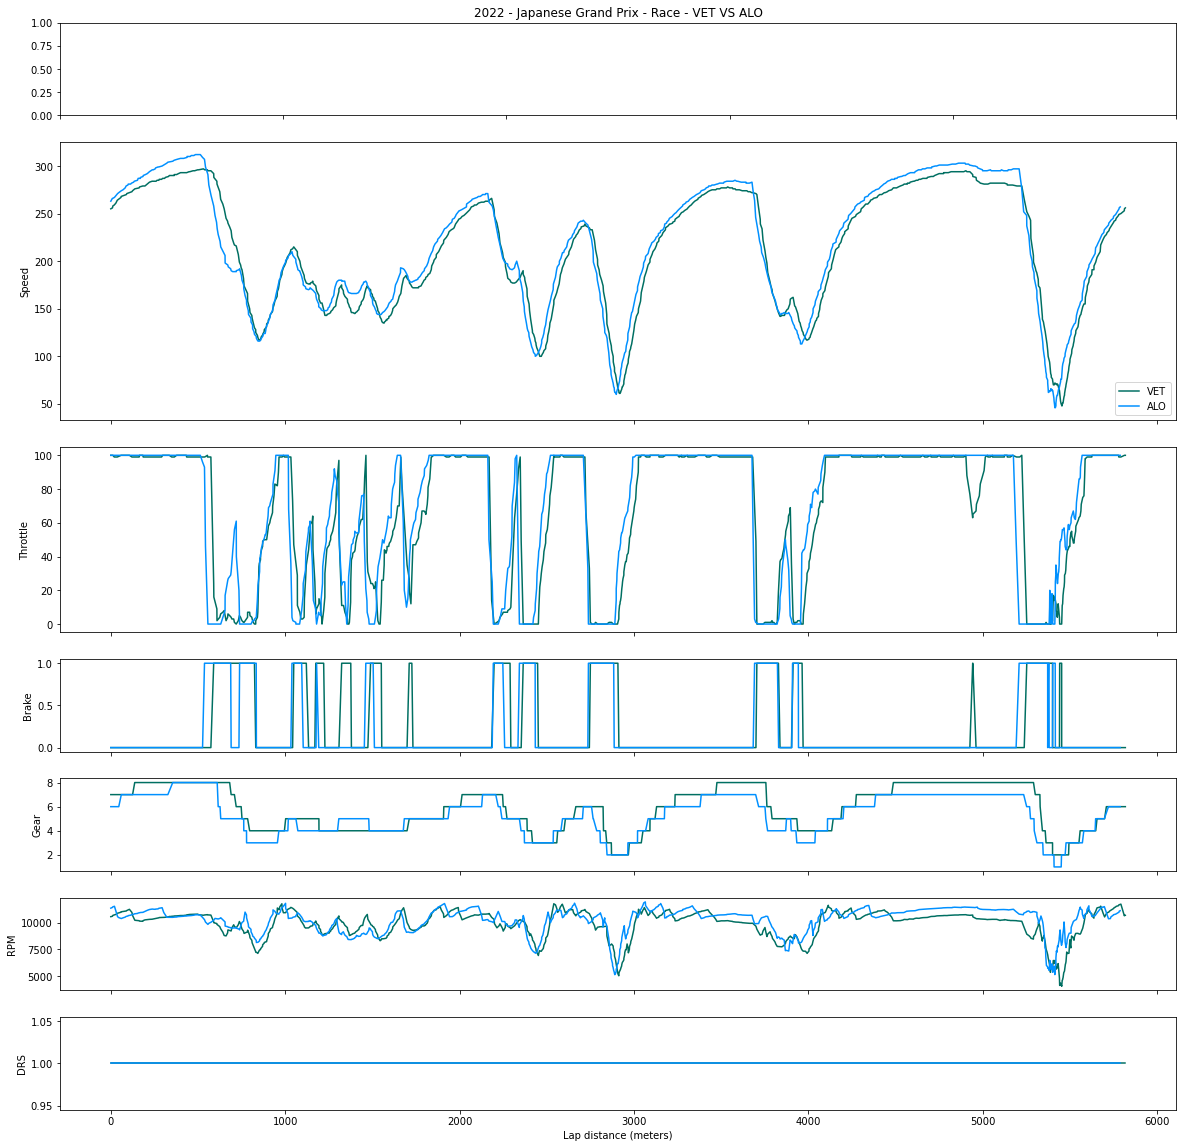

In [44]:
plt.rcParams['figure.figsize'] = plot_size

fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': plot_ratios})

ax[0].title.set_text(plot_title)

# Speed trace
ax[1].plot(vet_finallap['Distance'], vet_finallap['Speed'], label=vet, color=ff1.plotting.team_color(vet_team))
ax[1].plot(alo_finallap['Distance'], alo_finallap['Speed'], label=alo, color=ff1.plotting.team_color(alo_team))
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

# Throttle trace
ax[2].plot(vet_finallap['Distance'], vet_finallap['Throttle'], label=vet, color=ff1.plotting.team_color(vet_team))
ax[2].plot(alo_finallap['Distance'], alo_finallap['Throttle'], label=alo, color=ff1.plotting.team_color(alo_team))
ax[2].set(ylabel='Throttle')

# Brake trace
ax[3].plot(vet_finallap['Distance'], vet_finallap['Brake'], label=vet, color=ff1.plotting.team_color(vet_team))
ax[3].plot(alo_finallap['Distance'], alo_finallap['Brake'], label=alo, color=ff1.plotting.team_color(alo_team))
ax[3].set(ylabel='Brake')

# Gear trace
ax[4].plot(vet_finallap['Distance'], vet_finallap['nGear'], label=vet, color=ff1.plotting.team_color(vet_team))
ax[4].plot(alo_finallap['Distance'], alo_finallap['nGear'], label=alo, color=ff1.plotting.team_color(alo_team))
ax[4].set(ylabel='Gear')

# RPM trace
ax[5].plot(vet_finallap['Distance'], vet_finallap['RPM'], label=vet, color=ff1.plotting.team_color(vet_team))
ax[5].plot(alo_finallap['Distance'], alo_finallap['RPM'], label=alo, color=ff1.plotting.team_color(alo_team))
ax[5].set(ylabel='RPM')

# DRS trace
ax[6].plot(vet_finallap['Distance'], vet_finallap['DRS'], label=vet, color=ff1.plotting.team_color(vet_team))
ax[6].plot(alo_finallap['Distance'], alo_finallap['DRS'], label=alo, color=ff1.plotting.team_color(alo_team))
ax[6].set(ylabel='DRS')
ax[6].set(xlabel='Lap distance (meters)')
for a in ax.flat:
    a.label_outer()

plt.savefig(plot_filename, dpi = 500)
plt.show()